# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port shepstone
Processing Record 2 of Set 1 | kapa'a
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | puerto natales
City not found. Skipping...
Processing Record 5 of Set 1 | janeng
Processing Record 6 of Set 1 | kuanda
Processing Record 7 of Set 1 | lerwick
City not found. Skipping...
Processing Record 8 of Set 1 | waitangi
City not found. Skipping...
Processing Record 9 of Set 1 | chonchi
Processing Record 10 of Set 1 | abalak
Processing Record 11 of Set 1 | codrington
Processing Record 12 of Set 1 | athens
Processing Record 13 of Set 1 | ola
Processing Record 14 of Set 1 | santana
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | college
Processing Record 19 of Set 1 | kanigiri
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | port

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          535
Lat           535
Lng           535
Max Temp      535
Humidity      535
Cloudiness    535
Wind Speed    535
Country       535
Date          535
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port shepstone,-30.7414,30.4550,70.36,81,7,12.75,ZA,1714542429
1,kapa'a,22.0752,-159.3190,78.78,83,75,11.50,US,1714542429
2,bilibino,68.0546,166.4372,33.01,91,100,1.54,RU,1714542430
3,janeng,-25.4167,25.5500,53.24,32,0,3.42,BW,1714542323
4,kuanda,56.3161,116.0806,35.33,61,100,14.50,RU,1714542429


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port shepstone,-30.7414,30.4550,70.36,81,7,12.75,ZA,1714542429
1,kapa'a,22.0752,-159.3190,78.78,83,75,11.50,US,1714542429
2,bilibino,68.0546,166.4372,33.01,91,100,1.54,RU,1714542430
3,janeng,-25.4167,25.5500,53.24,32,0,3.42,BW,1714542323
4,kuanda,56.3161,116.0806,35.33,61,100,14.50,RU,1714542429


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

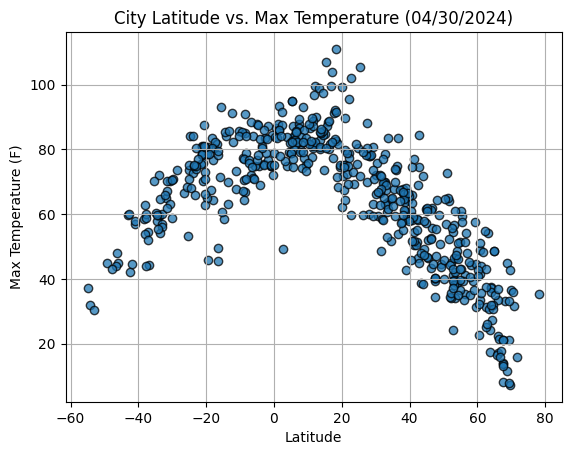

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (04/30/2024)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

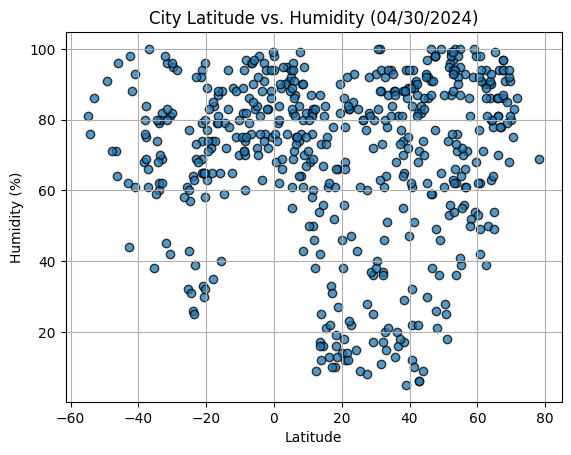

In [9]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (04/30/2024)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

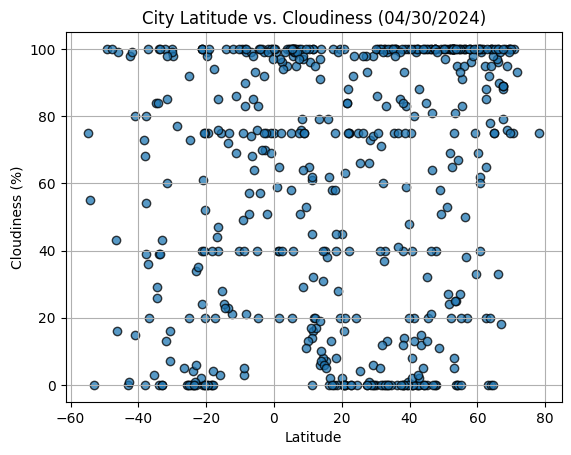

In [10]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (04/30/2024)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

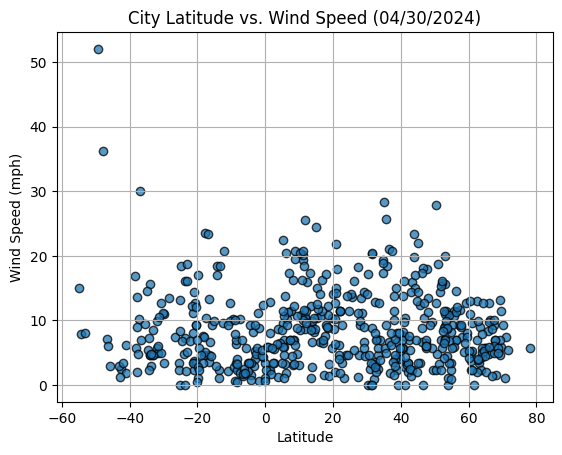

In [11]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (04/30/2024)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots and return r-value
def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create scatter plot
    plt.scatter(x_values,y_values)
    # Plot the regression line
    plt.plot(x_values,regress_values,"r-")
    # Annotate the line equation
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    # Label plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    # Show plot
    plt.show()
    
    # Return the r-value
    return rvalue


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kapa'a,22.0752,-159.3190,78.78,83,75,11.50,US,1714542429
2,bilibino,68.0546,166.4372,33.01,91,100,1.54,RU,1714542430
4,kuanda,56.3161,116.0806,35.33,61,100,14.50,RU,1714542429
6,abalak,58.1286,68.5944,44.35,52,96,7.49,RU,1714542433
8,athens,37.9795,23.7162,67.66,74,40,11.50,GR,1714542433


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port shepstone,-30.7414,30.4550,70.36,81,7,12.75,ZA,1714542429
3,janeng,-25.4167,25.5500,53.24,32,0,3.42,BW,1714542323
5,chonchi,-42.6128,-73.8092,42.12,98,98,2.44,CL,1714542432
7,codrington,-38.2667,141.9667,58.55,68,73,16.84,AU,1714542433
10,santana,-0.0583,-51.1817,78.98,94,75,3.44,BR,1714542434


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7722121455308225


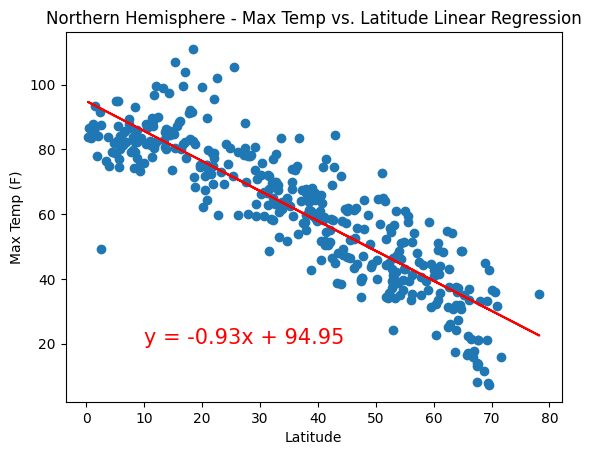

The r-value is: -0.8787560216185278


In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function to create the linear regression plot and get the r-value
r_value = plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Northern Hemisphere - Max Temp vs. Latitude Linear Regression", (10,20))

# Print the r-value
print(f"The r-value is: {r_value}")


The r-squared is: 0.5432825786264189


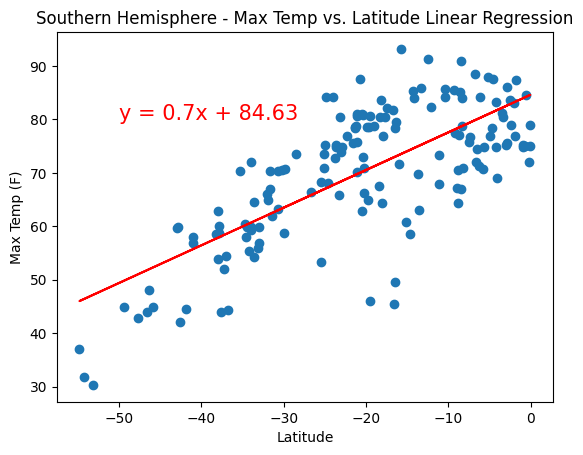

The r-value is: 0.7370770506713792


In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function to create the linear regression plot and get the r-value
r_value = plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Southern Hemisphere - Max Temp vs. Latitude Linear Regression", (-50,80))

# Print the r-value
print(f"The r-value is: {r_value}")


**Discussion about the linear relationship:** The linear regression plot for temperature against latitude reveals a clear trend: as we move away from the equator (latitude 0), temperatures generally decrease in the Northern Hemisphere and increase in the Southern Hemisphere. This relationship is intuitive, as regions closer to the equator receive more direct sunlight and thus tend to be warmer, while polar regions receive less direct sunlight and are colder.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.028717702096627738


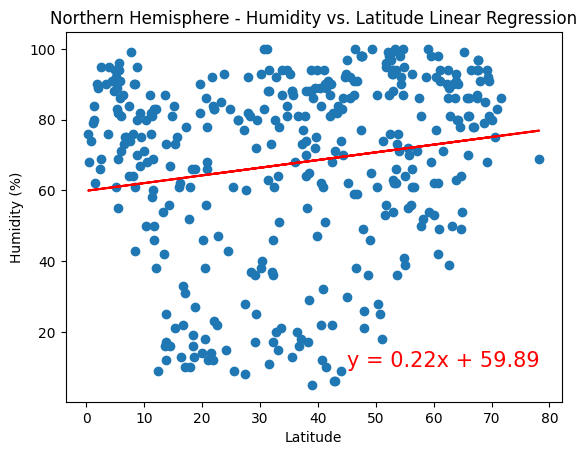

The r-value is: 0.16946298149338615


In [17]:
# Linear regression on Northern Hemisphere - Humidity vs. Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function to create the linear regression plot and get the r-value
r_value = plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Northern Hemisphere - Humidity vs. Latitude Linear Regression", (45,10))

# Print the r-value
print(f"The r-value is: {r_value}")


The r-squared is: 0.04408056039174857


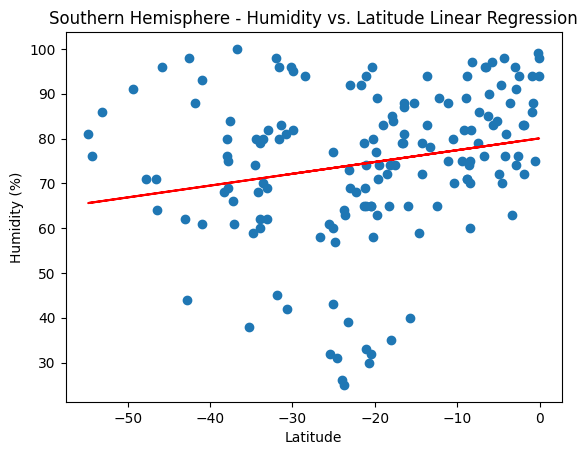

The r-value is: 0.2099537101166554


In [18]:
# Linear regression on Southern Hemisphere - Humidity vs. Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function to create the linear regression plot and get the r-value
r_value = plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Southern Hemisphere - Humidity vs. Latitude Linear Regression", (-50,20))

# Print the r-value
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** The linear regression plot for humidity against latitude does not show a strong linear relationship. Instead, humidity levels appear to vary widely across different latitudes, indicating that factors other than latitude, such as proximity to bodies of water, local climate patterns, and elevation, play significant roles in determining humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.01824878851124535


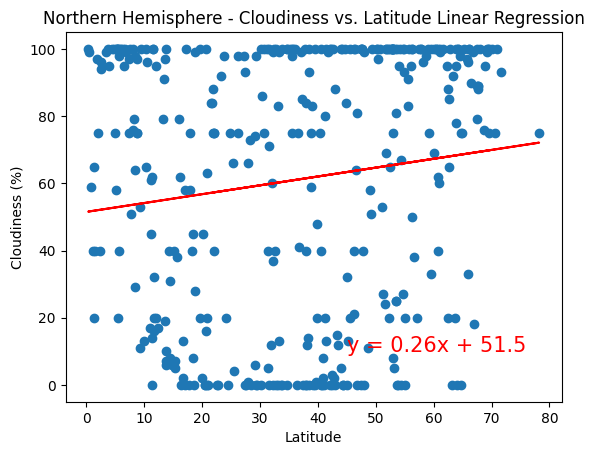

The r-value is: 0.13508807686559665


In [19]:
# Linear regression on Northern Hemisphere - Cloudiness vs. Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function to create the linear regression plot and get the r-value
r_value = plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression", (45,10))

# Print the r-value
print(f"The r-value is: {r_value}")


The r-squared is: 0.054436122792693394


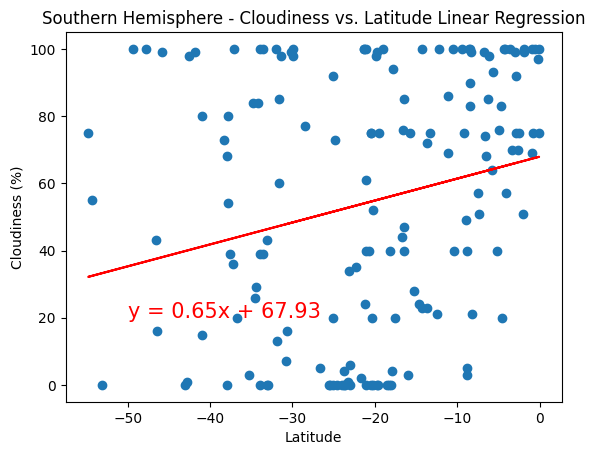

The r-value is: 0.23331550054099148


In [20]:
# Linear regression on Southern Hemisphere - Cloudiness vs. Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function to create the linear regression plot and get the r-value
r_value = plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression", (-50,20))

# Print the r-value
print(f"The r-value is: {r_value}")


**Discussion about the linear relationship:** The linear regression plot for cloudiness against latitude also does not demonstrate a clear linear trend. Cloudiness is influenced by a multitude of factors including temperature, humidity, wind patterns, and atmospheric pressure. Therefore, its relationship with latitude alone may not be linear and can vary greatly depending on local atmospheric conditions.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.018468703378205137


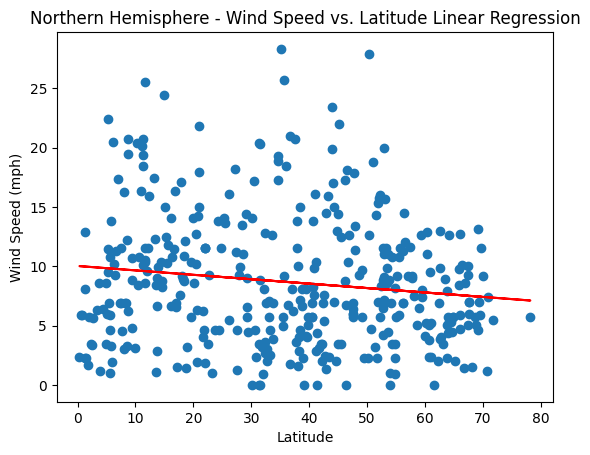

The r-value is: -0.13589960771909954


In [21]:
# Linear regression on Northern Hemisphere - Wind Speed vs. Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function to create the linear regression plot and get the r-value
r_value = plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression", (10,30))

# Print the r-value
print(f"The r-value is: {r_value}")


The r-squared is: 0.07044876597702808


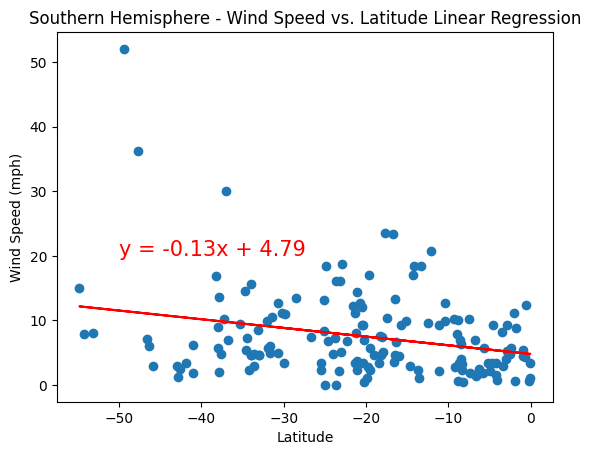

The r-value is: -0.265421864165385


In [22]:
# Linear regression on Southern Hemisphere - Wind Speed vs. Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function to create the linear regression plot and get the r-value
r_value = plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression", (-50,20))

# Print the r-value
print(f"The r-value is: {r_value}")


**Discussion about the linear relationship:** The linear regression plot for wind speed against latitude shows a slight increase in wind speed in both the Northern and Southern Hemispheres as we move away from the equator. This can be attributed to the Coriolis effect, which causes air movement to deflect towards the right in the Northern Hemisphere and towards the left in the Southern Hemisphere, leading to the formation of wind patterns such as trade winds and westerlies.

In [23]:
pip install folium


Note: you may need to restart the kernel to use updated packages.
